## PERC Rule for Pulmonary Embolism

### Seven Criteria of PERC Rule



1. Age < 50 years
2. Heart rate < 100 bpm
3. Oxygen saturation ≥ 95% 
4. No hemoptysis
5. No estrogen use
6. No prior venous thromboembolism (VTE)
7. No unilateral leg swelling

### Quick Overview

In [1]:
import sys
import os
from collections import defaultdict
sys.path.append(os.path.abspath(os.path.join('..')))
from calc_agent.perc_utils import *

dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
df = dataset["train"].to_pandas()  # or "test"
df_test = dataset["test"].to_pandas()  # or "test"

perc_df = df[df["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

perc_df_test = df_test[df_test["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

# Load dataset
dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
df = dataset["train"].to_pandas()  # or "test"
df_test = dataset["test"].to_pandas()  # or "test"
# Filter for calculator name "PERC"

perc_df = df[df["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]

perc_df_test = df_test[df_test["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]


/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/malthehli/Documents/ai_paper_tool/calc_agent/perc_utils.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perc_df["Parsed Entities"] = perc_df["Relevant Entities"].apply(safe_p

#### Running prompt


=== Evaluating model: Llama-3.3-70B-Instruct ===

Batch Progress: 100.0% (133/133)

Done ✅

=== Evaluating model: Med42-Qwen2.5-72B-v3-bi ===

Batch Progress: 100.0% (133/133)

Done ✅

=== Summary Counts ===
type
correct    174
wrong       90
invalid      2
Name: count, dtype: int64


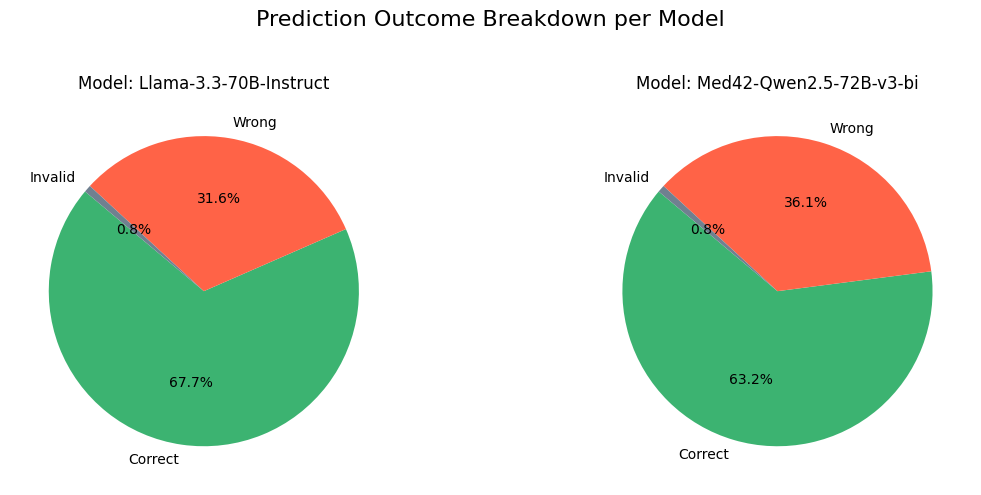

In [ ]:
sys_instruct = (
    "You are a clinical decision support assistant.\n"
)
prompt = (
    "Patient Note:\n"
    "<patient note text here>\n\n"
    "Calculate the PERC score for this patient based on the 8 criteria below. "
    "Explain how each criterion applies using the patient note and extracted entities, then return the result in the specified JSON format.\n\n"
    "Your task is to calculate the PERC (Pulmonary Embolism Rule-out Criteria) score for a patient using the provided note and extracted entities.\n\n"
    "There are 8 criteria. Each criterion is evaluated as either:\n"
    " - true: criterion met (meaning favorable condition, no risk factor present),\n"
    " - false: criterion not met (risk factor present).\n"
    "Each false criterion adds 1 point to the PERC score.\n\n"
    "PERC Criteria:\n"
    "1. Age < 50 years\n"
    "2. Heart rate < 100 beats per minute\n"
    "3. Oxygen saturation ≥ 95%\n"
    "4. No unilateral leg swelling\n"
    "5. No hemoptysis\n"
    "6. No recent trauma or surgery\n"
    "7. No history of deep vein thrombosis (DVT) or pulmonary embolism (PE)\n"
    "8. No hormone (estrogen) use\n\n"
    "If data for any criterion is missing or not explicitly mentioned, assume the criterion is met (true).\n\n"
    "First, provide a detailed step-by-step explanation about how you evaluated each criterion based on the patient data.\n\n"
    "Then, provide the output JSON object exactly matching this format (with no extra text):\n\n"
    "{\n"
    "  \"Explanation\": \"<Concise summary explaining evaluation of each criterion>\",\n"
    "  \"Criteria\": {\n"
    "    \"Age < 50\": true or false,\n"
    "    \"HR < 100\": true or false,\n"
    "    \"O₂ ≥ 95%\": true or false,\n"
    "    \"No hemoptysis\": true or false,\n"
    "    \"No Hormone use\": true or false,\n"
    "    \"No prior VTE or DVT\": true or false,\n"
    "    \"No unilateral leg swelling\": true or false,\n"
    "    \"No recent trauma or surgery\": true or false\n"
    "  },\n"
    "  \"Answer\": <integer equal to the total number of false criteria (sum of false values)>\n"
    "}\n"
)

results_df= await run_models_with_output(
    sys_instruct = sys_instruct
    ,prompt=prompt,
    model_ids=model_ids,
    include_relevant_entities=False,
    full_df=True,max_tokens=1000,temperature=0.0
)
plot_df_pie(results_df)



### Accuracy (Used the data from "More detailed system instruction (does not include relevant entities in prompt)")

#### Outputs and Ground truth answer

In [3]:
perc_df["Parsed Entities"] = perc_df["Relevant Entities"].apply(ast.literal_eval)
accuracy_table = compute_truth_table(results_df)
print(accuracy_table)


Model                        Llama-3.3-70B-Instruct  Med42-Qwen2.5-72B-v3-bi
Criterion                                                                   
Age < 50                                      1.000                    1.000
HR < 100                                      0.985                    0.970
No Hormone use                                0.932                    0.947
No hemoptysis                                 0.977                    0.977
No prior VTE or DVT                           0.955                    0.977
No recent trauma or surgery                   0.833                    0.833
No unilateral leg swelling                    0.902                    0.917
O₂ ≥ 95%                                      0.962                    0.955


/var/folders/y5/cg9ckmtx691dkg8sg071p0qw0000gq/T/ipykernel_29729/2873050477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perc_df["Parsed Entities"] = perc_df["Relevant Entities"].apply(ast.literal_eval)


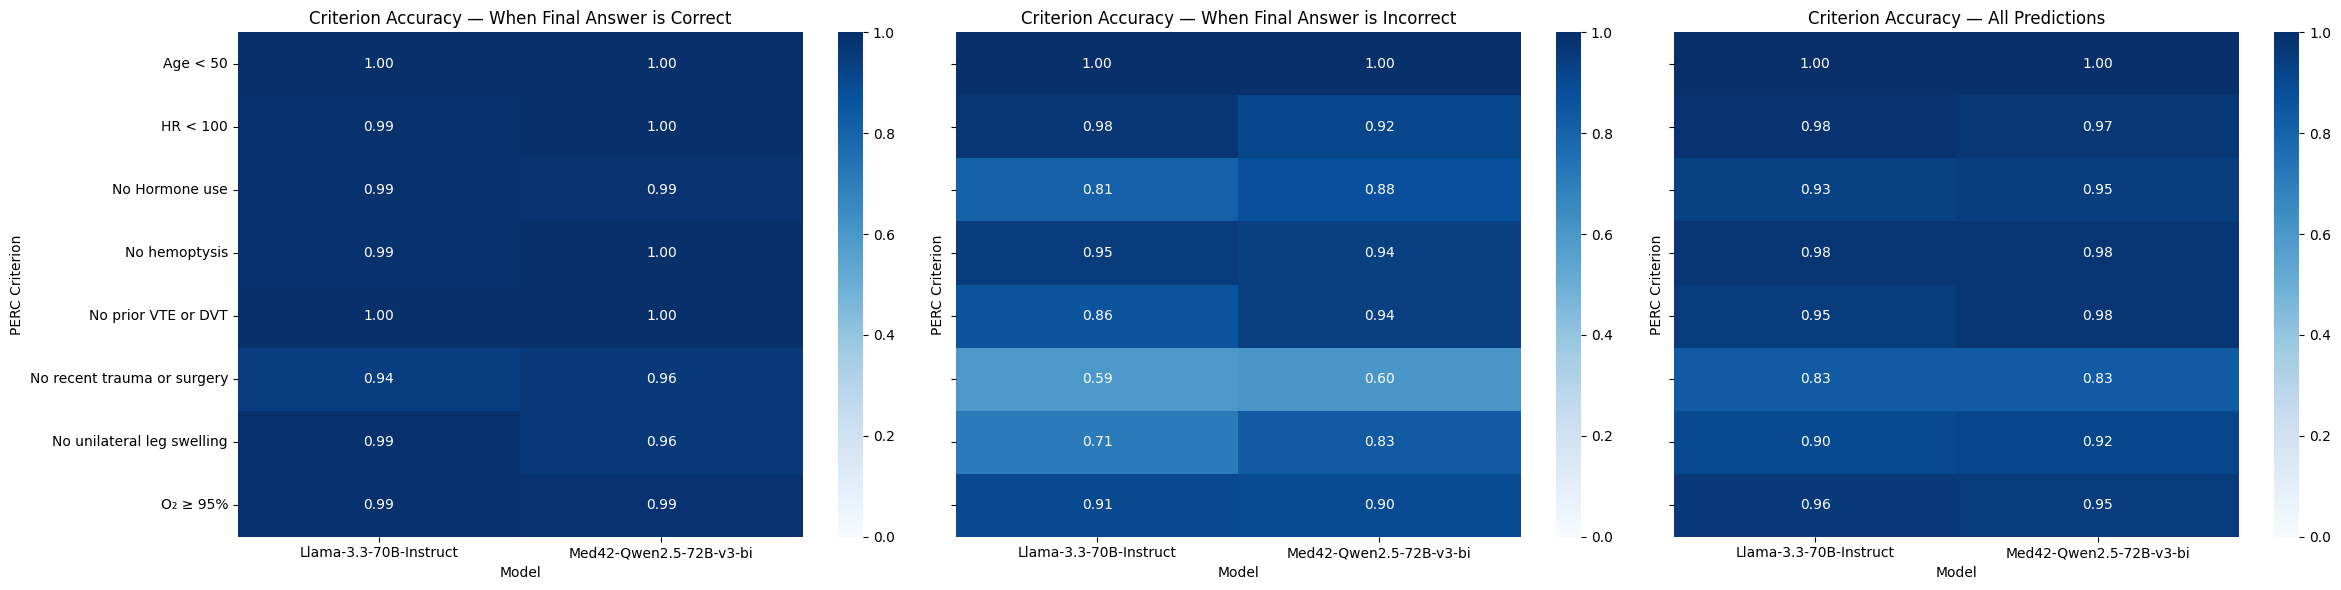

In [4]:
plot_criteria_accuracy_by_outcome(results_df)

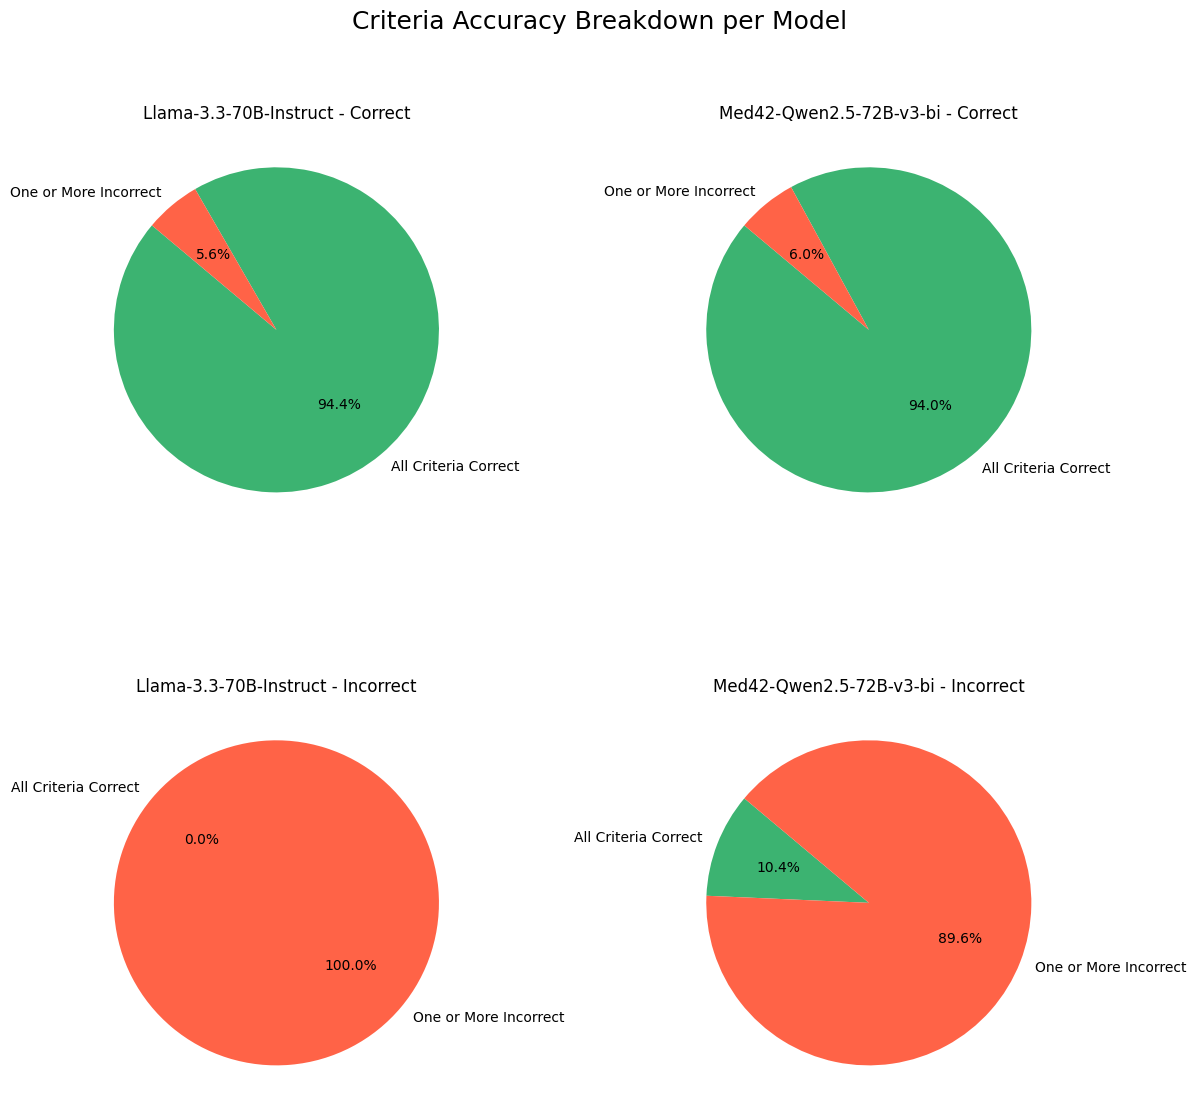

In [5]:
plot_criteria_accuracy_pie(results_df)

### Troubleshooting Wrong/Incorrect Answers

In [6]:
print_troubleshooting_outputs(results_df)


===== INCORRECT OUTPUTS (90) =====

--- Wrong Reply 1 ---
Model: Llama-3.3-70B-Instruct
Expected: 3 | Predicted: 2.0
Patient Note:
A 73-year-old female was brought by emergency medical services (EMS) to the emergency department (ED) after a motor vehicle collision (MVC). She was driving when her car crashed into a streetlamp at 40 miles per hour. The EMS team reported that the pole intruded into the passenger compartment and the patient required a prolonged extrication. She had a Glasgow Coma Scale score (GCS) of 11 when EMS arrived at the scene, which improved to a 15 after repeated evaluations. She was conscious, alert, and oriented at the scene and during transport.
The patient had difficulty recalling the events before the collision. She remembered feeling “like I was having a panic attack” just before the crash, and she did not recall the car impacting the streetlamp. In the ED, she complained of substernal chest pressure. The patient’s history was limited due to her continued di

### Checking Validation function

In [7]:
validated_results_df = await validate_model_outputs_with_json(
    sys_instruct="You are a clinical decision support assistant.",
    results_df=results_df,
    temperature=0.0,
    max_tokens=1000
)

Batch Progress: 100.0% (133/133)
Batch Progress: 100.0% (133/133)


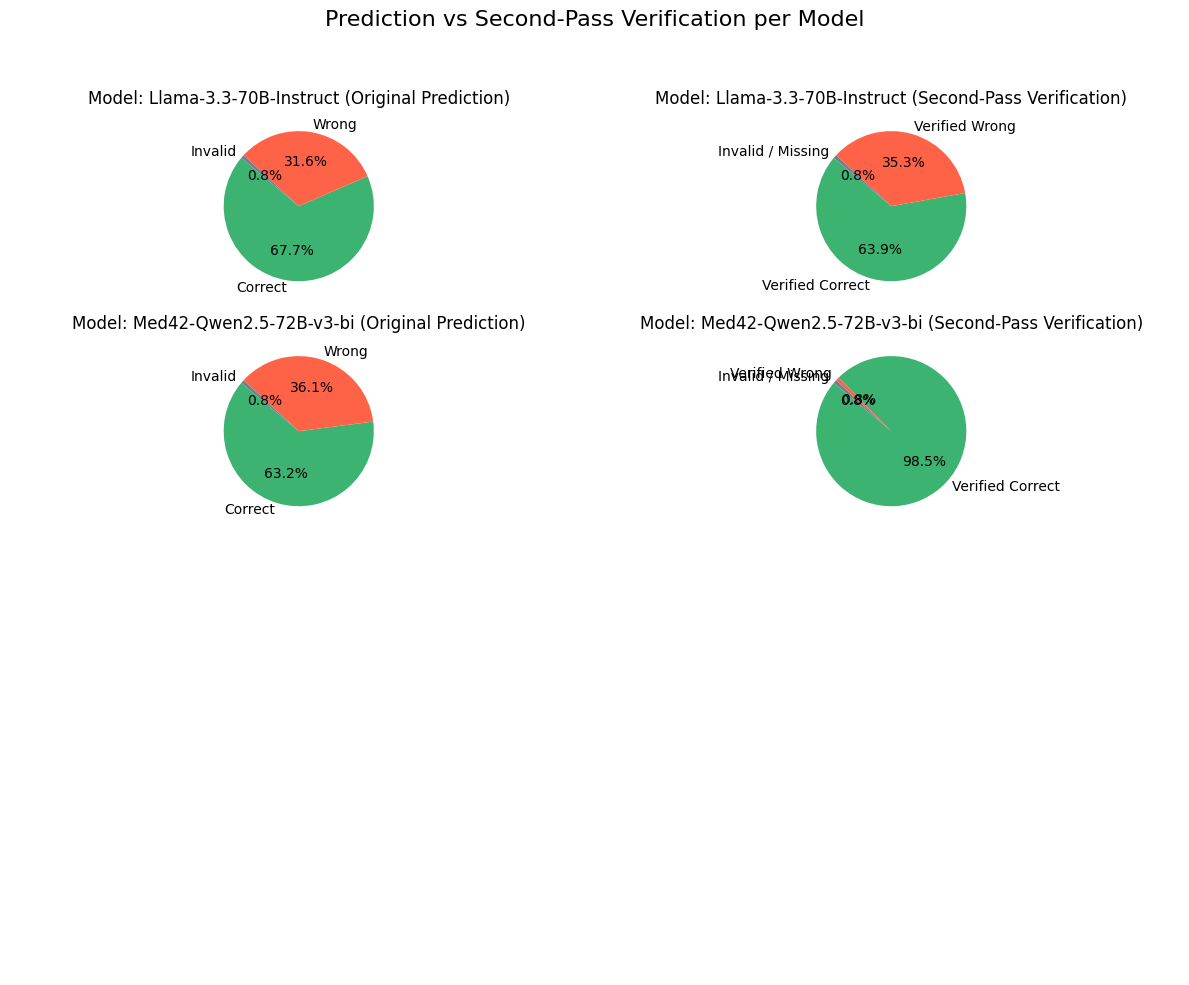

In [8]:
plot_corrected_json_verification_pie(validated_results_df)

In [2]:
sys_instruct = (
    "You are a clinical decision support assistant.\n"
)
prompt = """

Output ONLY a JSON object containing the values for these parameters:
- age (number)
- heart_rate (number)
- oxygen_saturation (number)
- has_hemoptysis (true/false)
- on_estrogen (true/false)
- history_dvt_pe (true/false) 
- unilateral_leg_swelling (true/false)
- recent_trauma_or_surgery (true/false)

Example output:
{
  "age": 55,
  "heart_rate": 110,
  "oxygen_saturation": 94,
  "has_hemoptysis": false,
  "on_estrogen": true,
  "history_dvt_pe": false,
  "unilateral_leg_swelling": false,
  "recent_trauma_or_surgery": true
}
"""



results_df_agent = await run_models_with_output(
    sys_instruct = sys_instruct
    ,prompt=prompt,
    model_ids=model_ids,
    include_relevant_entities=False,
    full_df=True,max_tokens=1000,temperature=0.0
)



=== Evaluating model: Llama-3.3-70B-Instruct ===

Batch Progress: 100.0% (133/133)

Done ✅

=== Evaluating model: Med42-Qwen2.5-72B-v3-bi ===

Batch Progress: 100.0% (133/133)

Done ✅

=== Summary Counts ===
type
invalid    266
Name: count, dtype: int64
